### Evaluación del modelo con los datos de test

In [2]:
import pandas as pd
import numpy as np
import xml.etree.ElementTree as ET


In [3]:
def extract_test_data(RUTE_DATASETS_TEST) -> None:
    '''
    Esta función transforma los datos del formato XML a un formato JSON que es más fácil de trabajar.
    '''
    # Parsear el archivo XML
    tree = ET.parse(RUTE_DATASETS_TEST)
    root = tree.getroot()

    # Listas para almacenar los datos
    data = []

    # Iterar sobre los nodos NLM-QUESTION
    for question in root.findall('.//NLM-QUESTION'):
        question_id = question.attrib.get('qid') or question.attrib.get('id')  # Obtener el ID de la pregunta
        subject = question.find('Original-Question/SUBJECT').text if question.find('Original-Question/SUBJECT') is not None else None  # Obtener el tema de la pregunta si existe
        message = question.find('Original-Question/MESSAGE').text if question.find('Original-Question/MESSAGE') is not None else None  # Obtener el mensaje de la pregunta si existe
       
        for focus in question.findall('.//ANNOTATIONS/FOCUS'):
            focus_text = focus.text
        
        for type_info in question.findall('.//ANNOTATIONS/TYPE'):
            type_info= type_info.text.upper()

        for ref_answer in question.findall('.//RefAnswer') or question.findall('.//ReferenceAnswer'):

            aid = ref_answer.attrib.get('aid'),
            answer = ref_answer.find('ANSWER').text
            

            data.append({
                'question_id': question_id,
                'subject': subject,
                'message': message,
                'focus': focus_text,
                'type': type_info,
                'aid': aid,
                'answer': answer
            })
        df = pd.DataFrame(data)

        df = df.dropna(subset = "message")

    return df

In [4]:
df_test = extract_test_data("TEST DATASETS/TREC-2017-LiveQA-Medical-Test.xml")

In [5]:
df_test

,question_id,subject,message,focus,type,aid,answer
0,TQ1,Noonan syndrome,What are the references with noonan syndrome a...,polycystic renal disease,EFFECT,"(TQ1A1,)",Noonan's syndrome is an eponymic designation ...
1,TQ1,Noonan syndrome,What are the references with noonan syndrome a...,polycystic renal disease,EFFECT,"(TQ1A2,)",10% of patients with Noonan syndrome have rena...
2,TQ1,Noonan syndrome,What are the references with noonan syndrome a...,polycystic renal disease,EFFECT,"(TQ1A3,)","Genitourinary. Renal abnormalities, generally ..."
3,TQ2,Gluten information,Re:NDC# 0115-0672-50 Zolmitriptan tabkets 5mg....,Zolmitriptan,INGREDIENT,"(TQ2A1,)",Zolmitriptan tablets are available as 2.5 mg (...
4,TQ3,amphetamine salts 20 mg,are they gluten free\t,amphetamine salts,INGREDIENT,"(TQ3A1,)",\n\t\t\t\t\tActive Ingredients\n\t\t\t\t\tAmph...
...,...,...,...,...,...,...,...
162,TQ100,General health,how does effextor cause ED and what is the mi...,effextor,SIDE_EFFECT,"(TQ100A2,)",Antidepressants most likely to cause sexual si...
163,TQ101,NSAIDS as a potential cause of ED,How long has this non prescription drug been i...,NSAIDS,SIDE_EFFECT,"(TQ101A1,)",Non-aspirin NSAID use was associated with an ...
164,TQ102,General health,i want to know more about aeortic stenosis,aeortic stenosis,TREATMENT,"(TQ102A1,)",The aorta is the main artery that carries blo...
165,TQ103,None,What can cause white cells ti uprate,white cells uprate,CAUSE,"(TQ103A1,)",A high white blood cell count usually indicat...


### Limpieza de datos

In [7]:
from data_cleaning import clean_text, clean_df, insert_type_cols, preprocess_text, preprocess_df, delete_words, delete_words_df

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anton\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\anton\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anton\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [8]:
df_test_clean = clean_df(df_test)

In [9]:
df_test_clean.answer.iloc[2]

'Genitourinary. Renal abnormalities, generally mild, are present in 11% of individuals with NS. Dilatation of the renal pelvis is most common. Duplex collecting systems, minor rotational anomalies, distal ureteric stenosis, renal hypoplasia, unilateral renal agenesis, unilateral renal\n\t\t\t\t\tectopia, and bilateral cysts with scarring are reported less commonly.'

In [10]:
df_test_clean.type.unique()

array(['effect', 'ingredient', 'prevention', 'contraindication', 'cause',
       'treatment', 'information', 'symptom', 'diagnosis',
       'personorganization', 'tapering', 'usage', 'complication',
       'interaction', 'susceptibility', 'alternative', 'indication',
       'storagedisposal', 'sideeffect', 'lifestylediet', 'comparison',
       'prognosis', 'dosage'], dtype=object)

In [11]:
df_train = clean_df(pd.read_csv("data/data.csv", header=0))
df_train.type.value_counts()

type
treatment               296
information             133
cause                    40
diagnosis                27
prognosis                24
symptom                  19
organization             17
susceptibility           14
association               9
inheritance               9
complication              8
side effects              6
prevention                5
indication                5
usage                     4
contraindication          3
storage and disposal      2
tapering                  2
interaction               2
dosage                    2
resources                 2
ingredient                1
genetic changes           1
diagnoseme                1
Name: count, dtype: int64

In [12]:
test_map = {
    'effect': 'information',
    'ingredient': 'ingredient',
    'prevention': 'prevention',
    'contraindication': 'contraindication',
    'cause': 'cause',
    'treatment': 'treatment',
    'information': 'information',
    'symptom': 'symptom',
    'diagnosis': 'diagnosis',
    'personorganization': 'organization',
    'tapering': 'tapering',
    'usage': 'usage',
    'complication': 'complication',
    'interaction': 'interaction',
    'susceptibility': 'susceptibility',
    'alternative': 'treatment',
    'indication': 'indication',
    'storagedisposal': 'storage and disposal',
    'sideeffect': 'side effects',
    'lifestylediet': 'prevention',
    'comparison': 'information',
    'prognosis': 'prognosis',
    'dosage': 'dosage'}

In [13]:
df_test_clean.type = df_test_clean.type.map(test_map)

In [14]:
df_test_clean.dropna(subset = "type")

,question_id,subject,message,focus,type,aid,answer
0,TQ1,Noonan syndrome,what are the references with noonan syndrome a...,polycystic renal disease,information,"(TQ1A1,)",Noonan's syndrome is an eponymic designation ...
1,TQ1,Noonan syndrome,what are the references with noonan syndrome a...,polycystic renal disease,information,"(TQ1A2,)",10% of patients with Noonan syndrome have rena...
2,TQ1,Noonan syndrome,what are the references with noonan syndrome a...,polycystic renal disease,information,"(TQ1A3,)","Genitourinary. Renal abnormalities, generally ..."
3,TQ2,Gluten information,rendc zolmitriptan tabkets mg i have celiac di...,zolmitriptan,ingredient,"(TQ2A1,)",Zolmitriptan tablets are available as 2.5 mg (...
4,TQ3,amphetamine salts 20 mg,are they gluten free\t,amphetamine salts,ingredient,"(TQ3A1,)",\n\t\t\t\t\tActive Ingredients\n\t\t\t\t\tAmph...
...,...,...,...,...,...,...,...
162,TQ100,General health,how does effextor cause ed and what is the mi...,effextor,side effects,"(TQ100A2,)",Antidepressants most likely to cause sexual si...
163,TQ101,NSAIDS as a potential cause of ED,how long has this non prescription drug been i...,nsaids,side effects,"(TQ101A1,)",Non-aspirin NSAID use was associated with an ...
164,TQ102,General health,i want to know more about aeortic stenosis,aeortic stenosis,treatment,"(TQ102A1,)",The aorta is the main artery that carries blo...
165,TQ103,None,what can cause white cells ti uprate,white cells uprate,cause,"(TQ103A1,)",A high white blood cell count usually indicat...


In [15]:
df_test_clean.type.value_counts()

type
information             29
treatment               24
cause                   14
susceptibility          14
diagnosis                9
usage                    8
prevention               8
complication             8
side effects             7
interaction              7
tapering                 7
symptom                  6
ingredient               5
organization             5
storage and disposal     4
contraindication         4
prognosis                3
dosage                   3
indication               2
Name: count, dtype: int64

In [16]:
df_test_complete = insert_type_cols(df_test_clean.dropna(subset = "type"))

### Evaluación clasificador general

In [18]:
from sklearn.preprocessing import LabelEncoder
df_complete = pd.read_csv("data/data_complete.csv", header=0)

from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
import torch

general_classifier_path = './model_weights'  
general_classifier = DistilBertForSequenceClassification.from_pretrained(general_classifier_path)
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')


In [19]:
focus_list = list(df_complete.focus.unique())
focus_list = [word for sentence in focus_list for word in sentence.split()]

included_words = ["syndrome", "deformity", "body", "disease", "mouth", 
             "nose", "ear", "congenital", "gender", "teen", "poison", "mouth",
              "help", "to", "me", "leg", "pain", "abdominal", "a", "size", "of",
              'bb', 'in','my','right','forearm', "havent", 'cannot','eat','losing',
              'weight','hard','time','getting','to','sleep','not','being','able','to',
              'breath','binge','drinker','have','trouble','walking','using','morphine',
              'fire','burn','gives','stain','odd','alcohol','and','opiate','withdrawal',
              'penis','did','not','grow','binocular','vision','hands','hurt','throat','heart',
              'condition', 'prostate', "lung", "chicken", "vaginal", "night", "nerve", "disorder"
             ] + list(df_complete.type.unique())

focus_list = [word for word in focus_list if word not in included_words]

In [20]:
predictions = []
for new_message in df_test_complete.drop_duplicates(subset="message").message:

    
    new_message = clean_text(new_message)
    new_message = preprocess_text(new_message)
    new_message = delete_words(new_message, focus_list)
    
    label_encoder = LabelEncoder()
    label_encoder.fit_transform(df_complete['type_general'])
    
    # Tokenizar el mensaje
    inputs = tokenizer(new_message, return_tensors='pt', padding=True, truncation=True)

    # Obtener la predicción
    with torch.no_grad():
        logits = general_classifier(**inputs).logits
        predicted_class = logits.argmax().item()
    
    # Decodificar la clase predicha
    
    predicted_label = label_encoder.inverse_transform([predicted_class])[0]

    predictions.append(predicted_label)

In [21]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

print(classification_report(list(df_test_complete.drop_duplicates(subset="message").type_general), predictions))
print(f"Exactitud: {accuracy_score(list(df_test_complete.drop_duplicates(subset="message").type_general), predictions)}")

              precision    recall  f1-score   support

 information       0.00      0.00      0.00        16
       other       0.82      0.58      0.68        71
   treatment       0.28      0.88      0.43        17

    accuracy                           0.54       104
   macro avg       0.37      0.49      0.37       104
weighted avg       0.61      0.54      0.53       104

Exactitud: 0.5384615384615384


Matriz de confusión:
[[ 0  7  9]
 [ 1 41 29]
 [ 0  2 15]]


Text(0.5, 1.0, 'Matriz de Confusión')

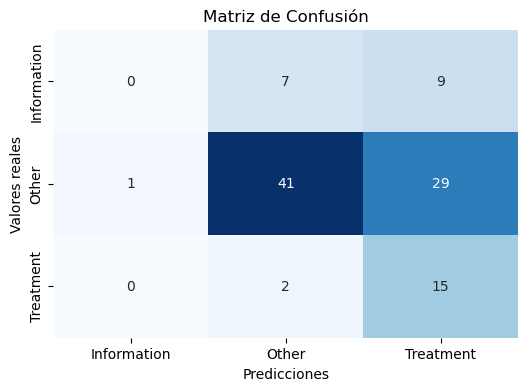

In [22]:
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
confusion = confusion_matrix(list(df_test_complete.drop_duplicates(subset="message").type_general), predictions)

# Imprimir la matriz
print("Matriz de confusión:")
print(confusion)

import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de confusión (confusion) calculada

# Crear el heatmap
plt.figure(figsize=(6, 4))
axs = sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
axs.set_xticklabels(['Information', 'Other', 'Treatment'])
axs.set_yticklabels(['Information', 'Other', 'Treatment'])
plt.xlabel("Predicciones")
plt.ylabel("Valores reales")
plt.title("Matriz de Confusión")

### Evaluación Clasificador especifico

In [24]:
from bert_embeddings import get_bert_embeddings

In [26]:
import joblib
df_test_other = df_test_complete[df_test_complete.type_general == 'other']
especific_classifier = joblib.load('random_forest_especific_classifier.pkl')

especific_predictions = []
for new_message in df_test_other.drop_duplicates(subset="message").message:
    
    new_message = delete_words(new_message, focus_list) #El clasificador especifico se entrenó aplicando delete_words() a los mensajes
    new_embedd = get_bert_embeddings(new_message)
    
    pred = especific_classifier.predict([new_embedd])[0]
    especific_predictions.append(pred)
    

In [27]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

print(classification_report(list(df_test_other.drop_duplicates(subset="message").type_especific), especific_predictions))
print(f"Exactitud: {accuracy_score(list(df_test_other.drop_duplicates(subset="message").type_especific), especific_predictions)}")

                precision    recall  f1-score   support

   association       0.00      0.00      0.00         0
         cause       0.31      0.50      0.38         8
     diagnosis       0.40      0.40      0.40         5
    indication       0.60      0.45      0.51        20
  organization       0.60      0.60      0.60         5
         other       0.27      0.20      0.23        20
     prognosis       0.00      0.00      0.00         2
susceptibility       0.50      0.25      0.33         8
       symptom       0.40      0.67      0.50         3

      accuracy                           0.37        71
     macro avg       0.34      0.34      0.33        71
  weighted avg       0.42      0.37      0.38        71

Exactitud: 0.36619718309859156


C:\Users\anton\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\anton\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\anton\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Matriz de confusión:
[[0 0 0 0 0 0 0 0 0]
 [1 4 1 0 0 1 0 1 0]
 [0 0 2 1 0 1 0 1 0]
 [1 3 1 9 1 4 0 0 1]
 [0 1 0 0 3 0 1 0 0]
 [1 4 1 5 1 4 3 0 1]
 [0 1 0 0 0 1 0 0 0]
 [0 0 0 0 0 3 2 2 1]
 [0 0 0 0 0 1 0 0 2]]


Text(0.5, 1.0, 'Matriz de Confusión')

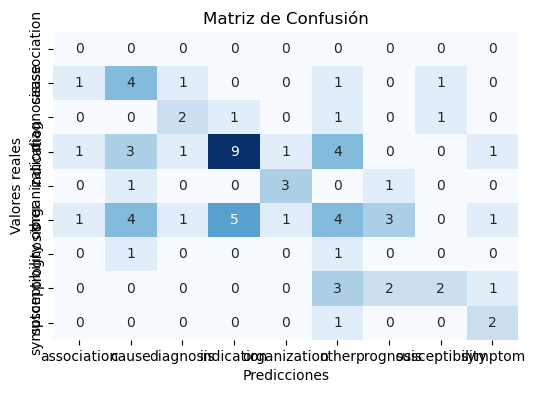

In [68]:
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
confusion = confusion_matrix(list(df_test_other.drop_duplicates(subset="message").type_especific), especific_predictions)

# Imprimir la matriz
print("Matriz de confusión:")
print(confusion)

import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de confusión (confusion) calculada

# Crear el heatmap
plt.figure(figsize=(6, 4))
axs = sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
axs.set_xticklabels(['association', 'cause', 'diagnosis', 'indication', 'organization', 'other', 'prognosis', 'susceptibility', 'symptom'])
axs.set_yticklabels(['association', 'cause', 'diagnosis', 'indication', 'organization', 'other', 'prognosis', 'susceptibility', 'symptom'])
plt.xlabel("Predicciones")
plt.ylabel("Valores reales")
plt.title("Matriz de Confusión")

### Evaluación clasificador completo

In [30]:
from classifier import classifier

In [31]:
especific_classifier = joblib.load('random_forest_especific_classifier.pkl')
# Cargar el modelo preentrenado
general_classifier_path = './model_weights'  # Ruta donde guardaste los pesos del modelo
general_classifier = DistilBertForSequenceClassification.from_pretrained(general_classifier_path)

# Cargar el tokenizador
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')


In [32]:
complete_prediction = []
for new_message in df_test_complete.drop_duplicates(subset="message").message:

    complete_prediction.append(classifier(new_message, general_classifier, tokenizer , especific_classifier, df_complete))
    

In [66]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

print(classification_report(list(df_test_complete.drop_duplicates(subset="message").type_especific), complete_prediction))
print(f"Exactitud: {accuracy_score(list(df_test_complete.drop_duplicates(subset="message").type_especific), complete_prediction)}")

                precision    recall  f1-score   support

   association       0.00      0.00      0.00         0
         cause       0.29      0.50      0.36         8
     diagnosis       0.40      0.40      0.40         5
    indication       0.55      0.30      0.39        20
   information       0.44      0.25      0.32        16
  organization       0.33      0.20      0.25         5
         other       0.24      0.20      0.22        20
     prognosis       0.00      0.00      0.00         2
susceptibility       0.40      0.25      0.31         8
       symptom       0.33      0.33      0.33         3
     treatment       0.33      0.59      0.43        17

      accuracy                           0.33       104
     macro avg       0.30      0.27      0.27       104
  weighted avg       0.37      0.33      0.33       104

Exactitud: 0.3269230769230769


C:\Users\anton\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\anton\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\anton\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Matriz de confusión:
[[ 0  0  0  0  0  0  0  0  0  0  0]
 [ 1  4  1  0  0  0  1  0  1  0  0]
 [ 0  0  2  1  0  0  1  0  1  0  0]
 [ 1  3  0  6  1  0  4  0  0  0  5]
 [ 1  0  0  0  4  2  3  2  1  1  2]
 [ 0  1  0  0  2  1  0  0  0  0  1]
 [ 0  3  1  3  0  0  4  1  0  1  7]
 [ 0  1  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  1  2  0  4]
 [ 0  0  0  0  0  0  1  0  0  1  1]
 [ 0  2  1  1  1  0  2  0  0  0 10]]


Text(0.5, 1.0, 'Matriz de Confusión')

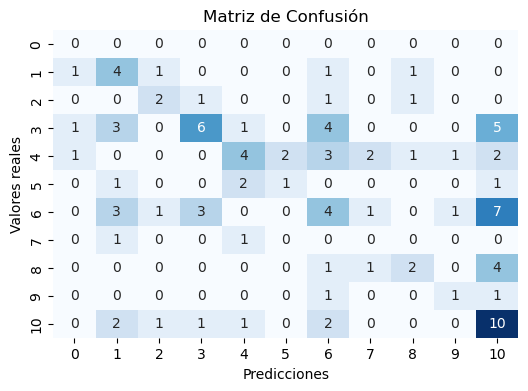

In [64]:
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
confusion = confusion_matrix(list(df_test_complete.drop_duplicates(subset="message").type_especific), complete_prediction)

# Imprimir la matriz
print("Matriz de confusión:")
print(confusion)

import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de confusión (confusion) calculada

# Crear el heatmap
plt.figure(figsize=(6, 4))
axs = sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
#axs.set_xticklabels(['association', 'cause', 'diagnosis', 'indication', 'information', 'organization', 'other', 'prognosis', 'susceptibility', 'symptom', 'treatment'])
#axs.set_yticklabels(['association', 'cause', 'diagnosis', 'indication', 'information', 'organization', 'other', 'prognosis', 'susceptibility', 'symptom', 'treatment'])
plt.xlabel("Predicciones")
plt.ylabel("Valores reales")
plt.title("Matriz de Confusión")